# Weapon Damage Per Turn

## Setting Up

In [1]:
import pandas as pd
from scripts.weapon import max_shots, burst
from scripts.accuracy import average_to_hit

weapon_stats = pd.read_csv("datasets/weapon_stats.csv")
ammo_stats = pd.read_csv("datasets/ammo_stats.csv")
weapon_firemodes = pd.read_csv("datasets/weapon_firemodes.csv")
damage_modifiers = pd.read_csv("datasets/damage_modifiers.csv")

In [2]:
%run weapon_full_data.ipynb

## Damage Ranking

### Most Damaging Weapon

In a single turn, shooting as much as possible, which weapon does the most damage.

This takes into account reloading.

In [3]:
most_damaging_weapon_average = weapon_data[["weapon", "turn_damage_expected"]]
most_damaging_weapon_average = most_damaging_weapon_average.groupby("weapon").mean()

In [4]:
most_damaging_weapon_max = weapon_data[["weapon", "turn_damage_expected"]]
most_damaging_weapon_max = most_damaging_weapon_max.groupby("weapon").max()

In [5]:
most_damaging_weapon = most_damaging_weapon_max.merge(most_damaging_weapon_average, on="weapon")
most_damaging_weapon = most_damaging_weapon.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon = most_damaging_weapon.sort_values(by=["average"])
most_damaging_weapon

,max,average
weapon,,
grenade,17.8750,17.875000
proximity_grenade,25.0250,25.025000
rifle,39.6000,30.800000
alien_grenade,32.1750,32.175000
auto_cannon,50.6880,36.194889
pistol,42.9000,38.181000
high_explosive,39.3250,39.325000
rocket_launcher,63.2500,41.295833
heavy_cannon,59.4000,41.580000


Text(0, 0.5, 'Damage')

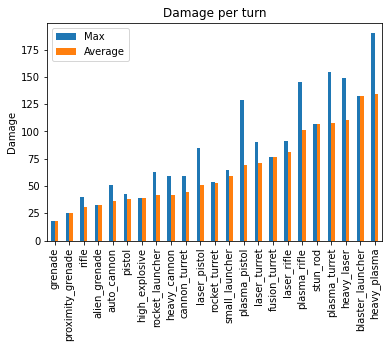

In [6]:
ax = most_damaging_weapon.plot.bar(title="Damage per turn", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Most Damaging Snapshot

In [7]:
most_damaging_weapon_snap_average = weapon_data[weapon_data["fire_mode"] == "snapshot"]
most_damaging_weapon_snap_average = most_damaging_weapon_snap_average[["weapon", "turn_damage_expected"]]
most_damaging_weapon_snap_average = most_damaging_weapon_snap_average.groupby("weapon").mean()

In [8]:
most_damaging_weapon_snap_max = weapon_data[weapon_data["fire_mode"] == "snapshot"]
most_damaging_weapon_snap_max = most_damaging_weapon_snap_max[["weapon", "turn_damage_expected"]]
most_damaging_weapon_snap_max = most_damaging_weapon_snap_max.groupby("weapon").max()

In [9]:
most_damaging_weapon_snap = most_damaging_weapon_snap_max.merge(most_damaging_weapon_snap_average, on="weapon")
most_damaging_weapon_snap = most_damaging_weapon_snap.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon_snap = most_damaging_weapon_snap.sort_values(by=["average"])
most_damaging_weapon_snap

,max,average
weapon,,
rocket_launcher,30.2500,26.720833
rifle,39.6000,39.600000
auto_cannon,44.3520,41.272000
pistol,42.9000,42.900000
laser_pistol,50.6000,50.600000
laser_turret,51.4250,51.425000
rocket_turret,51.4250,51.425000
heavy_cannon,59.4000,55.440000
plasma_pistol,55.7700,55.770000


Text(0, 0.5, 'Damage')

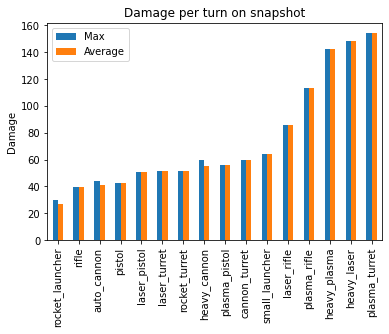

In [10]:
ax = most_damaging_weapon_snap.plot.bar(title="Damage per turn on snapshot", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Most Damaging Aimed

In [11]:
most_damaging_weapon_aim_average = weapon_data[weapon_data["fire_mode"] == "aimed"]
most_damaging_weapon_aim_average = most_damaging_weapon_aim_average[["weapon", "turn_damage_expected"]]
most_damaging_weapon_aim_average = most_damaging_weapon_aim_average.groupby("weapon").mean()

In [12]:
most_damaging_weapon_aim_max = weapon_data[weapon_data["fire_mode"] == "aimed"]
most_damaging_weapon_aim_max = most_damaging_weapon_aim_max[["weapon", "turn_damage_expected"]]
most_damaging_weapon_aim_max = most_damaging_weapon_aim_max.groupby("weapon").max()

In [13]:
most_damaging_weapon_aim = most_damaging_weapon_aim_max.merge(most_damaging_weapon_aim_average, on="weapon")
most_damaging_weapon_aim = most_damaging_weapon_aim.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon_aim = most_damaging_weapon_aim.sort_values(by=["average"])
most_damaging_weapon_aim

,max,average
weapon,,
laser_pistol,17.2040,17.204000
rifle,18.1500,18.150000
auto_cannon,21.6480,20.144667
plasma_pistol,24.3100,24.310000
heavy_cannon,29.7000,27.720000
cannon_turret,29.7000,29.700000
pistol,33.4620,33.462000
plasma_rifle,44.0000,44.000000
rocket_turret,53.7625,53.762500


Text(0, 0.5, 'Damage')

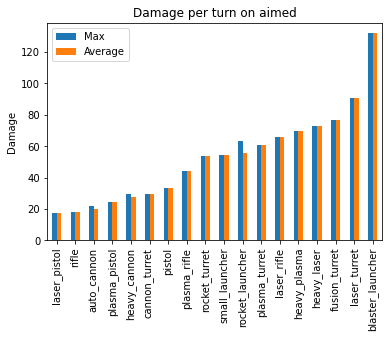

In [14]:
ax = most_damaging_weapon_aim.plot.bar(title="Damage per turn on aimed", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Most Damaging Auto

In [15]:
most_damaging_weapon_auto_average = weapon_data[weapon_data["fire_mode"] == "auto"]
most_damaging_weapon_auto_average = most_damaging_weapon_auto_average[["weapon", "turn_damage_expected"]]
most_damaging_weapon_auto_average = most_damaging_weapon_auto_average.groupby("weapon").mean()

In [16]:
most_damaging_weapon_auto_max = weapon_data[weapon_data["fire_mode"] == "auto"]
most_damaging_weapon_auto_max = most_damaging_weapon_auto_max[["weapon", "turn_damage_expected"]]
most_damaging_weapon_auto_max = most_damaging_weapon_auto_max.groupby("weapon").max()

In [17]:
most_damaging_weapon_auto = most_damaging_weapon_auto_max.merge(most_damaging_weapon_auto_average, on="weapon")
most_damaging_weapon_auto = most_damaging_weapon_auto.rename(columns={"turn_damage_expected_x": "max", "turn_damage_expected_y": "average"})
most_damaging_weapon_auto = most_damaging_weapon_auto.sort_values(by=["average"])
most_damaging_weapon_auto

,max,average
weapon,,
rifle,34.650,34.650
auto_cannon,50.688,47.168
laser_pistol,85.008,85.008
laser_rifle,91.080,91.080
plasma_pistol,128.700,128.700
plasma_rifle,145.200,145.200
heavy_plasma,189.750,189.750


Text(0, 0.5, 'Damage')

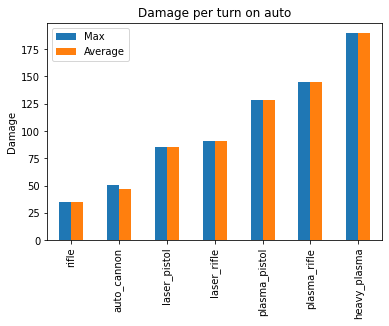

In [18]:
ax = most_damaging_weapon_auto.plot.bar(title="Damage per turn on auto", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Most Damaging Grenade

In [19]:
most_damaging_weapon_grenade = weapon_data[weapon_data["fire_mode"] == "grenade"]
most_damaging_weapon_grenade = most_damaging_weapon_grenade[["weapon", "turn_damage_expected"]]
most_damaging_weapon_grenade = most_damaging_weapon_grenade.rename(columns={"turn_damage_expected": "turn_damage"})
most_damaging_weapon_grenade = most_damaging_weapon_grenade.set_index(["weapon"])
most_damaging_weapon_grenade = most_damaging_weapon_grenade.sort_values(by=["turn_damage"])
most_damaging_weapon_grenade

,turn_damage
weapon,
grenade,17.875
proximity_grenade,25.025
alien_grenade,32.175
high_explosive,39.325


Text(0, 0.5, 'Damage')

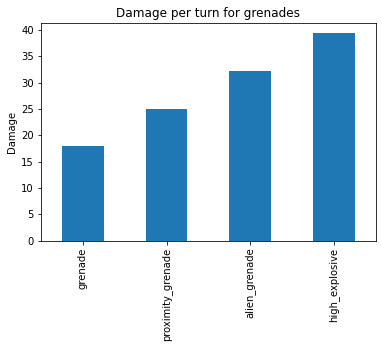

In [20]:
ax = most_damaging_weapon_grenade.plot.bar(title="Damage per turn for grenades", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")